In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

[INFO] 0/130 processesd
[INFO] 10/130 processesd
[INFO] 20/130 processesd
[INFO] 30/130 processesd
[INFO] 40/130 processesd
[INFO] 50/130 processesd
[INFO] 60/130 processesd
[INFO] 70/130 processesd
[INFO] 80/130 processesd
[INFO] 90/130 processesd
[INFO] 100/130 processesd
[INFO] 110/130 processesd
[INFO] 120/130 processesd
[INFO] 130/130 processesd
[INFO] 140/130 processesd
[INFO] 150/130 processesd
[INFO] 160/130 processesd
[INFO] 170/130 processesd
[INFO] 180/130 processesd
[INFO] 190/130 processesd
[INFO] 200/130 processesd
[INFO] 210/130 processesd
[INFO] 220/130 processesd
[INFO] 230/130 processesd
[INFO] 240/130 processesd
[INFO] 250/130 processesd
[INFO] 260/130 processesd
[INFO] 270/130 processesd
[INFO] 280/130 processesd
[INFO] 290/130 processesd
[INFO] 300/130 processesd
[INFO] 310/130 processesd
[INFO] 320/130 processesd
[INFO] 330/130 processesd
[INFO] 340/130 processesd
[INFO] 350/130 processesd
[INFO] 360/130 processesd
[INFO] 370/130 processesd
[INFO] 380/130 processe

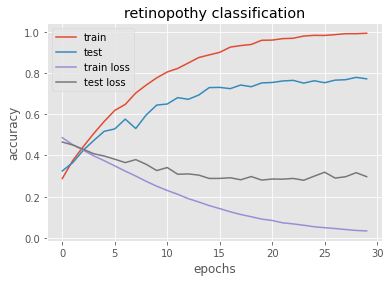

In [ ]:
data=[]
labels=[]

for i, item in enumerate(glob.glob("/content/drive/MyDrive/retina_classification//*//*")):
    img=cv2.imread(item)
    r_img=cv2.resize(img,(224,224))
    data.append(r_img)
    label=item.split("/")[-2]
    labels.append(label)
    if i % 10 ==0:
      print("[INFO] {}/130 processesd".format(i))
data = np.array(data)/255
le = LabelEncoder()
labels=le.fit_transform(labels)
labels=to_categorical(labels)


X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3)
baseModel=VGG16(include_top= False,
                weights="imagenet",
                input_tensor=layers.Input(shape=(224,224,3)))
net=models.Sequential([baseModel,
                      layers.MaxPooling2D(pool_size=(4,4)),
                      layers.Flatten(),
                      layers.Dense(64,activation="relu"),
                      layers.Dense(5,activation="softmax")
                      ])
#for layer in baseModel.layers:
  #layer.trainable= False
opt=SGD(learning_rate=0.01,
        decay=0.05/10,
        )
net.compile(optimizer=opt,
            loss="binary_crossentropy",
            metrics=["accuracy"])
H=net.fit(X_train,y_train,epochs = 30, batch_size= 8,validation_data = (X_test,y_test))
plt.style.use("ggplot")
plt.plot(H.history["accuracy"],label="train")
plt.plot(H.history["val_accuracy"],label="test")
plt.plot(H.history["loss"],label="train loss")
plt.plot(H.history["val_loss"],label="test loss")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("retinopothy classification")
plt.show()





In [ ]:
print(label)

/content/drive/MyDrive/parkinson/HC/HCteta_8.png


In [ ]:
net.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 1, 512)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                32832     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 325       
Total params: 14,747,845
Trainable params: 14,747,845
Non-trainable params: 0
_________________________________________________________________


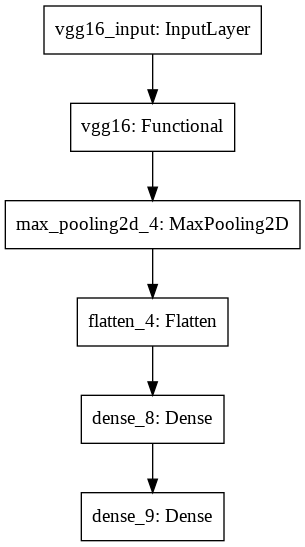

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(net)

In [ ]:
net.save("net.h5")

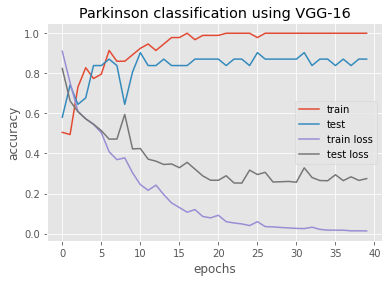

In [ ]:
plt.style.use("ggplot")
plt.plot(H.history["accuracy"],label="train")
plt.plot(H.history["val_accuracy"],label="test")
plt.plot(H.history["loss"],label="train loss")
plt.plot(H.history["val_loss"],label="test loss")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Parkinson classification using VGG-16")
plt.show()



